In [2]:
#L1/L2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

L2 C=0.01 Acc= 0.87


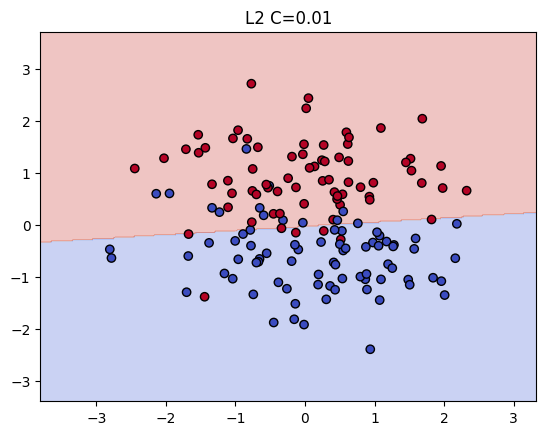

L2 C=1 Acc= 0.87


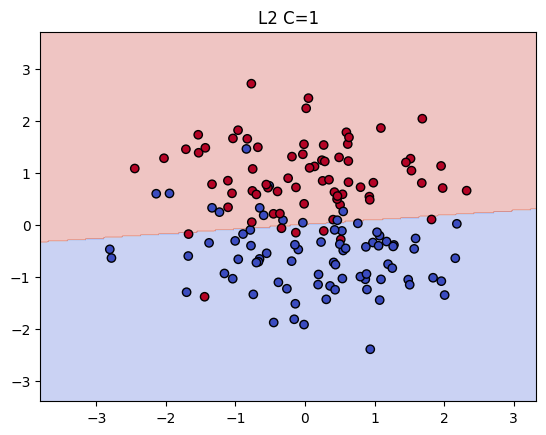

L2 C=100 Acc= 0.87


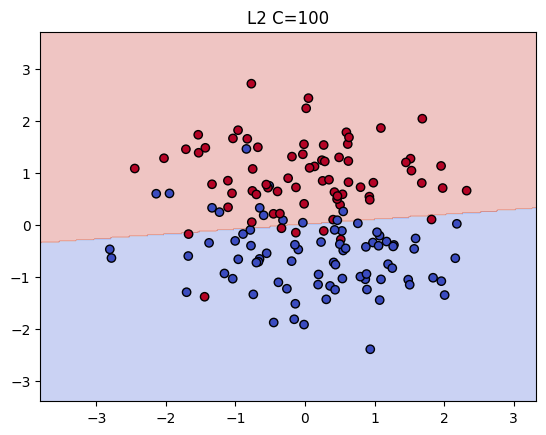

L1 C=1 Acc= 0.87


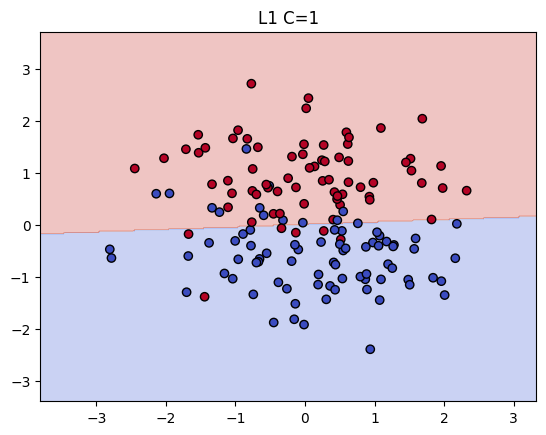

In [5]:
# Data
X, y = make_classification(n_samples=500, n_features=10, n_informative=2, random_state=42)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
Xtr, Xte = sc.fit_transform(Xtr), sc.transform(Xte)

def eval_model(penalty, C, title):
    m = LogisticRegression(penalty=penalty, C=C, solver='liblinear').fit(Xtr, ytr)
    print(title, "Acc=", round(accuracy_score(yte, m.predict(Xte)), 2))

    # plot (only 2 features)
    x1, x2 = Xte[:,0], Xte[:,1]
    xx, yy = np.meshgrid(np.linspace(x1.min()-1, x1.max()+1, 300),
                         np.linspace(x2.min()-1, x2.max()+1, 300))
    grid = np.zeros((xx.size, Xtr.shape[1]))
    grid[:, :2] = np.c_[xx.ravel(), yy.ravel()]
    Z = m.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(x1, x2, c=yte, cmap='coolwarm', edgecolor='k')
    plt.title(title); plt.show()

eval_model('l2', 0.01, "L2 C=0.01")
eval_model('l2', 1,    "L2 C=1")
eval_model('l2', 100,  "L2 C=100")
eval_model('l1', 1,    "L1 C=1")